# Mathematical Tools

- Approximation : Regression and interploation are among the most often used numerical techniques in finanace.

- Convex Optimization : A number of financial discipline need tools for convex optimization (for instance, derivatives analytics when it comes to model calibration)

- Integration : In particular, the valuation of financial (derivative) assets often boils down to the evaluation of integrals

- Symbolic Computation : Python provides with `Sympy` a powerful package for symbolic mathematics, for example, to solve (systems of) equations

## Approximation

In [139]:
# import libraries

import numpy as np
from pylab import plt, mpl 

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

%matplotlib inline

/var/folders/33/kd41s2sn64zftzgf4sg1_nrc0000gn/T/ipykernel_55005/1262228846.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [140]:
# The main example function

def f(x):
    return np.sin(x) + 0.5 * x

The main focus is the approximation of this function over a given intergral by regression and interpolation techniques.

In [141]:
# The function create_plot() is a helper function to create the same type of plot required multiple times in this chapter

def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

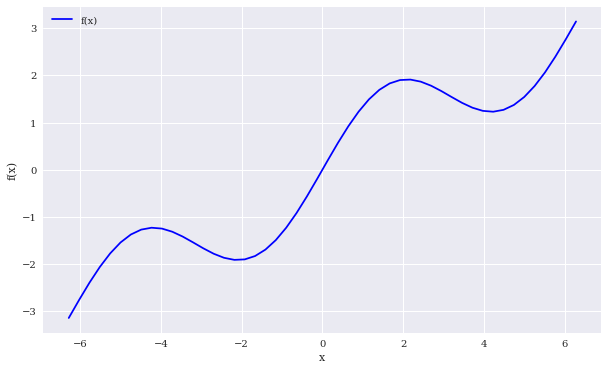

In [142]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)      # The x values for the plotting and the calculations between between -2 * pi and 2 * pi
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])

### Regression

Regression is not only suited to approximation one-dimensional funcitons but also works well in higher dimensions. Basically, the task of regression, given a set of basis functions, $b_d,d\in\{1, \cdots, D\}$, is to find optimal parameters $\alpha_1^*, \cdots, \alpha_D^*$, where $y_i\equiv f(x_i)$ for $i\in\{1, \codts , I\}$ observation points.

$x_i$ : independent observations

$y_i$ : dependent observations

$$\min_{\alpha_1,\cdots,\alpha_D}\frac{1}{I}\sum_{i=1}^I\left(y_i-\sum_{d=1}^D\alpha_d\cdot b_d(x_i)\right)^2$$

#### Nomials as basis functions
One of the simplest cases is to take monomials as basis functions - i.e., $b_1=1, b_2=x, b_3=x^2, b_4=x^3, \cdots$. `NumPy` has built-in functions for both the determination of the optimal parameters (`np.plotfit()`) and the evaluation of the approximation given a set of input values (`np.polyval()`).

In [143]:
res = np.polyfit(x, f(x), deg=1, full=True)     # Linear regression step, full=True returns diagnostic information in addtion
res     # full results : regression parameters, residuals, effective rank, singualr values, and relative condistion numbers

(array([ 4.28841952e-01, -4.31775426e-17]),
 array([21.03238686]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

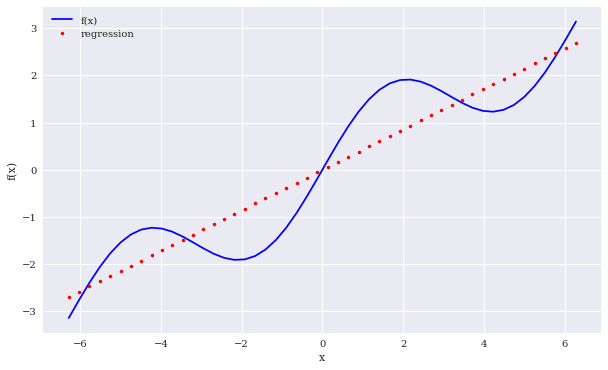

In [144]:
ry = np.polyval(res[0], x)      # Evaluating the regression parameter

create_plot([x, x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

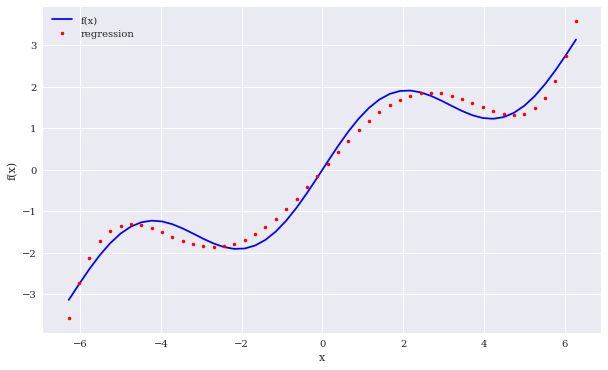

In [145]:
# The next regression attempt takes monomials up to the order of 5 as basis functions.
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

create_plot([x, x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

In [146]:
# The last attempt takes monomials up to order 7

reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)

np.allclose(f(x), ry)       # Checks whether the function and regression values are the same

False

In [147]:
np.mean((f(x) - ry) ** 2)   # Calculate the Mean Squared Error (MSE)

0.0017769134759517702

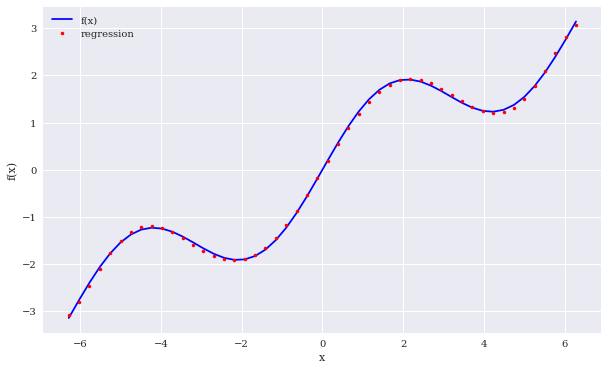

In [148]:
create_plot([x, x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

#### Individual basis function

One can reach better regression results by choosing better set of basis functions. The indivdual basis functions have to be defined via a matrix approach. The central function is `np.linalg.lstsq()`.

In [149]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1            # The basis function values from constant to cubic

reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]    # The regression step
reg.round(4)        # The optimal regression parameters

array([ 0.    ,  0.5628, -0.    , -0.0054])

In [150]:
ry = np.dot(reg, matrix)        # The regression estimates for the function values.

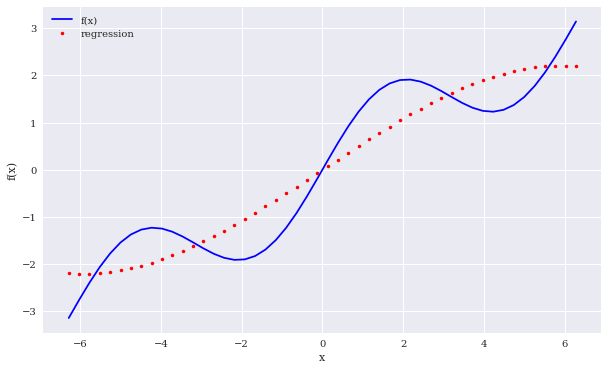

In [151]:
create_plot([x, x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

In [152]:
# inlcuding a sine function in the set of basis functions.

matrix[3, :] = np.sin(x)

reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]
reg.round(4)

array([0. , 0.5, 0. , 1. ])

In [153]:
ry = np.dot(reg, matrix)
np.allclose(f(x), ry)

True

In [154]:
np.mean((f(x) - ry) ** 2)

2.099263639382087e-31

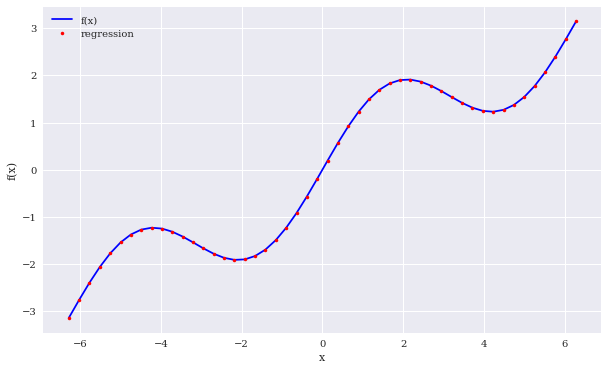

In [155]:
create_plot([x, x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

#### Noisy data
Regression can cope equally well with noisy date, be it data from simulation or from (nonperfect) measurements. Result below reveals that the regression results are close to the original function than the noisy data points.

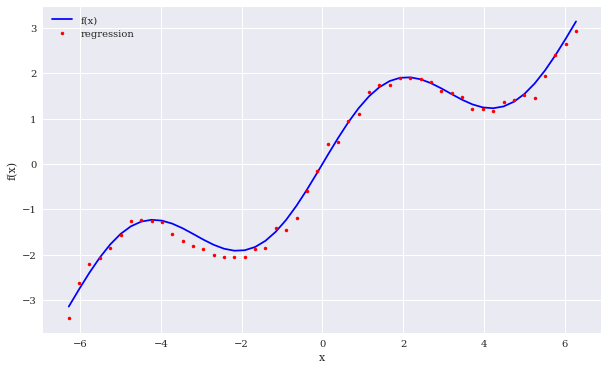

In [156]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)             
xn = xn + 0.15 * np.random.standard_normal(len(xn))     # introducing noise to the x values
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))  # introducing noise to the y values

reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

create_plot([x, x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

#### Undorted data

Another important aspect of regression is that the approach also works seamlessly with unsorted data.

In [157]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi     # randomizes the x values.
yu = f(xu)

print(xu[:10].round(2))
print(yu[:10].round(2))

[-5.13 -5.24 -5.45 -0.04  5.23 -4.68  0.1  -5.4   1.66 -3.23]
[-1.65 -1.76 -1.99 -0.05  1.75 -1.34  0.15 -1.93  1.82 -1.53]


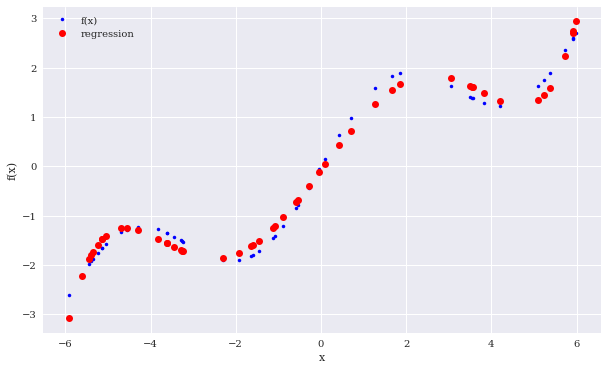

In [158]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

create_plot([xu, xu], [yu, ry], ['b.', 'ro'], ['f(x)', 'regression'], ['x', 'f(x)'])

As with the noisy data, the regression approach does not care for the order of the observation points.

#### Multiple dimenstions

Another convenient characteristics of the least-squares regression approach is that it carries over to multiple dimensions without too many modifications.

In [159]:
def fm(p):
    x, y = p
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y **2

To properly visaulize this function, grids of independent data points are needed. Based on such two-dimensional grids of independent and resulting dependent data points, embodied in the following `x`, `y`, and `z`.

In [160]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)    # Generates 2D ndarray objects ('grid') out of the 1D ndarray objects

Z = fm((X, Y))
x = X.flatten()     # yields 1D ndarray objects from the 2D ndarray objects
y = Y.flatten()

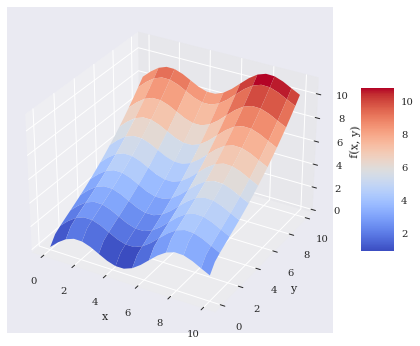

In [161]:
from mpl_toolkits.mplot3d import Axes3D         # imports 3D plotting capabilities from matplotlib

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap='coolwarm', linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [162]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)       # the np.sqrt() function for the y parameter
matrix[:, 5] = np.sin(x)        # the np.sin() function for the x parameter
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y 
matrix[:, 1] = x
matrix[:, 0] = 1

reg = np.linalg.lstsq(matrix, fm((x, y)), rcond=None)[0]
RZ = np.dot(matrix, reg).reshape((20, 20))      # transforms the regression result to the grid structure

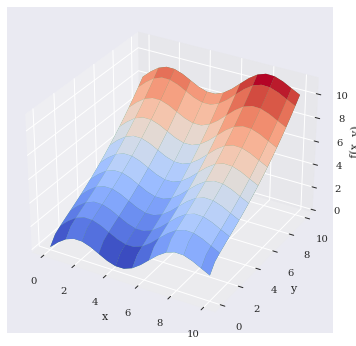

In [163]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)   # plot the original function surface
surf2 = ax.plot_surface(X, Y, RZ, rstride=2, cstride=2, label='regression')         # plot the regression surface
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
# ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)

### Interpolation

Interpolation (e.g., cubic splines) is more involved mathematically. It is limited to low-dimensional problems. The basic idea is to do a regression between two neighboring data points in such a way that not only are the data points perfectly matched by the resulting piecewise-defined interpolation function, but also the function is continuously differentiable at the data points.

In [164]:
# implements a linear splines interpolation

import scipy.interpolate as spi

x = np.linspace(-2 * np.pi, 2 * np.pi, 25)
def f(x):
    return np.sin(x) + 0.5 * x

ipo = spi.splrep(x, f(x), k=1)      # implements a linear spline interpolation
iy = spi.splev(x, ipo)              # derives the interpolated values
np.allclose(f(x), iy)               # checks whether the interpolated values are close to the function values

True

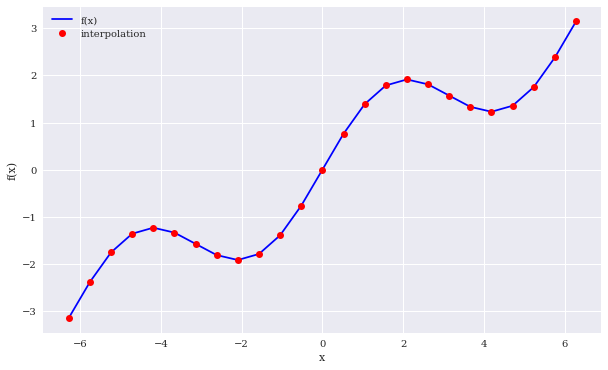

In [165]:
create_plot([x, x], [f(x), iy], ['b', 'ro'], ['f(x)', 'interpolation'], ['x', 'f(x)'])

Spline interpolation is often used in finance to generate estimates for dependent values of independent data points not included in the original observarions. The next exmaple picks a much smaller interval and has a closer look at the interpolated values with the linear splines. The interpolation function indeed interpolates linearly between two observation points. The function is not continuously differentiable at the original data points.

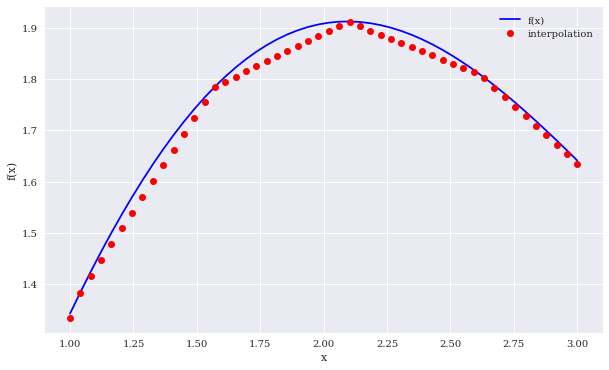

In [166]:
xd = np.linspace(1.0, 3.0, 50)      # smaller interval with more points
iyd = spi.splev(xd, ipo)

create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'], ['f(x)', 'interpolation'], ['x', 'f(x)'])

In [167]:
# cubic splines improves the results considerably

ipo = spi.splrep(x, f(x), k=3)          # cubic splines interpolation on complete data sets
iyd = spi.splev(xd, ipo)

np.allclose(f(xd), iyd)

False

In [168]:
np.mean((f(xd) - iyd) ** 2)

1.1349319851457788e-08

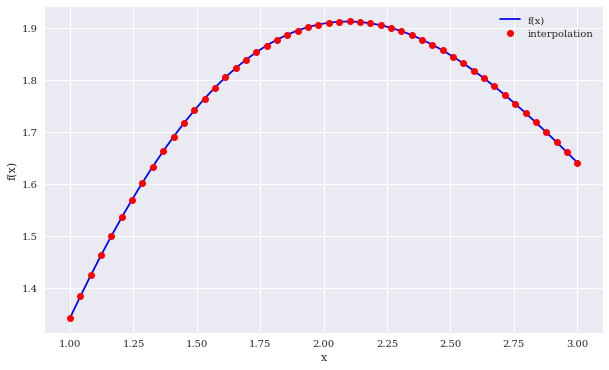

In [169]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'], ['f(x)', 'interpolation'], ['x', 'f(x)'])

## Convex Optimization
Convex optimiztion plays an important role in finance. Examples are the calibration of option pricing models to market data or the optimization of an agent's utility function.

In [170]:
def fm(p):
    x, y, = p
    return (np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2)

This fucntion has multiple local minima. The existence of a global minimum cannot really be confirmed by this particular graphical representation, but it seems to exist.

In [171]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

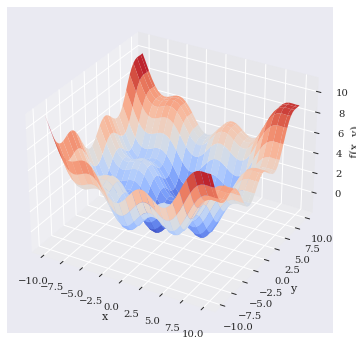

In [172]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap='coolwarm', linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

### Global Optimization

The functions `sco.brute()` and `sco.fmin()` that are applied are from `scipy.optimize`.

In [173]:
import scipy.optimize as sco

def fo(p):
    x, y = p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f | %8.4f | %8.4f' %(x, y, z))
    
    return z 

In [174]:
output = True                                                       # the information to print out if output = True
sco.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)        # The brute force optimization

-10.0000 | -10.0000 |  11.0880
-10.0000 |  -5.0000 |   7.7529
-10.0000 |   0.0000 |   5.5440
-10.0000 |   5.0000 |   5.8351
-10.0000 |  10.0000 |  10.0000
 -5.0000 | -10.0000 |   7.7529
 -5.0000 |  -5.0000 |   4.4178
 -5.0000 |   0.0000 |   2.2089
 -5.0000 |   5.0000 |   2.5000
 -5.0000 |  10.0000 |   6.6649
  0.0000 | -10.0000 |   5.5440
  0.0000 |  -5.0000 |   2.2089
  0.0000 |   0.0000 |   0.0000
  0.0000 |   5.0000 |   0.2911
  0.0000 |  10.0000 |   4.4560
  5.0000 | -10.0000 |   5.8351
  5.0000 |  -5.0000 |   2.5000
  5.0000 |   0.0000 |   0.2911
  5.0000 |   5.0000 |   0.5822
  5.0000 |  10.0000 |   4.7471
 10.0000 | -10.0000 |  10.0000
 10.0000 |  -5.0000 |   6.6649
 10.0000 |   0.0000 |   4.4560
 10.0000 |   5.0000 |   4.7471
 10.0000 |  10.0000 |   8.9120


array([0., 0.])

The optimal parameter values, given the initial parameterization of the function, are `x = y = 0`. The resulting function value is also 0, as a quick review of the preceding output reveals.

In [175]:
output = False
opt1 = sco.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)

opt1

array([-1.4, -1.4])

In [176]:
fm(opt1)

-1.7748994599769203

The optimal parameter values are now `x = y = -1.4` and the minimal function value for the global minimization is about -1.7749

### Local Optimization
The function `sco.fmin()` takes as input the function to minimize the starting parameter values. Optional parameter values are the input parameter tolerance and function value tolerance, as well as the maximum number of iterations and function calls.

In [177]:
output = True
opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)        # The local convex optimization

 -1.4000 |  -1.4000 |  -1.7749
 -1.4700 |  -1.4000 |  -1.7743
 -1.4000 |  -1.4700 |  -1.7743
 -1.3300 |  -1.4700 |  -1.7696
 -1.4350 |  -1.4175 |  -1.7756
 -1.4350 |  -1.3475 |  -1.7722
 -1.4088 |  -1.4394 |  -1.7755
 -1.4438 |  -1.4569 |  -1.7751
 -1.4328 |  -1.4427 |  -1.7756
 -1.4591 |  -1.4208 |  -1.7752
 -1.4213 |  -1.4347 |  -1.7757
 -1.4235 |  -1.4096 |  -1.7755
 -1.4305 |  -1.4344 |  -1.7757
 -1.4168 |  -1.4516 |  -1.7753
 -1.4305 |  -1.4260 |  -1.7757
 -1.4396 |  -1.4257 |  -1.7756
 -1.4259 |  -1.4325 |  -1.7757
 -1.4259 |  -1.4241 |  -1.7757
 -1.4304 |  -1.4177 |  -1.7757
 -1.4270 |  -1.4288 |  -1.7757


/var/folders/33/kd41s2sn64zftzgf4sg1_nrc0000gn/T/ipykernel_55005/3773732271.py:2: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)        # The local convex optimization


In [178]:
opt2

array([-1.42702972, -1.42876755])

In [179]:
fm(opt2)

-1.7757246992239009

For many convex optimization problems it is advisable to have a global minimization before the local one. The following shows that setting the starting parameterization to `x=y=2` gives, a "minimum" value of above zero.

In [180]:
output = False
sco.fmin(fo, (2.0, 2.0), maxiter=250)


Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

### Constrained Optimization
Consider the utility maximization problem of an investor who can invest in two risky securities.

Both securities cost $q_a=q_b=10$ USD today

Both securieies have a payoff of 15 USD and 5 USD, respectively after one year, denoted that $r_a$ and $r_b$.

The investor has a budget of $w_0=100$ USD to invest and derives utility from future wealth according to the utility function $u(w)=\sqrt{w}$, where $w$ is the wealth available.

Expected utility maximization problem (1)
$$\max_{a,b}\mathbf{E}(u(w_1))=p\sqrt{w_{1u}}+(1-p)\sqrt{w_{1d}}$$
$$w_1=a\cdot r_a+b\cdot r_b$$
$$w_0\ge a\cdot q_a + b\cdot q_b$$
$$ a, b \ge 0$$

Expected utility maximization problem (2)
$$\min_{a,b}-\mathbf{E}(u(w_1))=-(0.5\cdot \sqrt{w_{1u}}+0.5\cdot\sqrt{w_{1d}})$$
$$w_{1u}=a\cdot 15 + b\cdot 5$$
$$w_{1d} = a\cdot 5 + b\cdot 12$$
$$100 \ge a\cdot 10 + b\cdot 10$$
$$a,b \ge 0$$

To solve this problem, the `scipy.minimize()` function is appropriate.

In [181]:
import math

def Eu(p):      # The function to be minimized, in order to maximize the expected utility
    s, b = p
    return -(0.5 * math.sqrt(s * 15 + b *5) + 0.5 * math.sqrt(s * 5 + b * 12))      


In [182]:
cons = ({'type': 'ineq',
        'fun': lambda p: 100-p[0] * 10 -p[1] * 10})     # the inequality constraint as a dict object

bnds = ((0, 1000), (0, 1000))                           # The constrained optimization

result = sco.minimize(Eu, [5, 5], method='SLSQP', bounds=bnds, constraints=cons)
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

In [183]:
result['x']     # optimal parameter values

array([8.02547122, 1.97452878])

In [184]:
-result['fun']  # the negative minimum function values as the optimal solution value

9.700883611487832

In [185]:
np.dot(result['x'], [10, 10])   # the budget constraint is binding; all wealth is invested

100.0

## Intergration

The expectation in turn is a sum in the discrete case and an integral in the continuous case. The subpackage `scipy.intergrate` prvovides different functions for numerical integration.

In [186]:
import scipy.integrate as sci

def f(x):
    return np.sin(x) + 0.5 * x

Intergral of exmaple function
$$\int_{0.5}^{9.5}f(x)dx =\int_{0.5}^{9.5}sin(x)+\frac{x}{2}dx$$

In [187]:
x = np.linspace(0, 10)
y = f(x)
a = 0.5         # left integration limit
b = 9.5         # right integration limit
Ix = np.linspace(a, b)  # Integration interval values
Iy = f(Ix)      # Integration function values

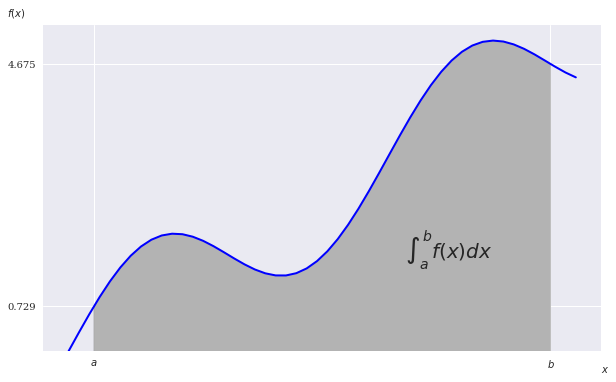

In [188]:
from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$", horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)])

### Numerical Integration
The `scipy.integrates` subpackages contains a selection of funtions to numerically integrate a given mathematical function for upper and lower integration limits. `sci.fixed_quad()` for fixed Gaussian quadrature, `sci.quad()` for adaptive quadraure, and `sci.romberg()` for Romberg integration.

In [189]:
sci.fixed_quad(f, a, b)[0]

24.3669959670846

In [190]:
sci.quad(f, a, b)[0]

24.374754718086752

In [191]:
sci.romberg(f, a, b)

24.374754718086713

There are a number of integration functions that take as input `list` or `ndarray` objects with function values and input values, respectively. Examples are `sci.trpaz()`, using the trapezoidal rule, and `sci.simps()`, implementing Simpson's rule.

In [192]:
xi = np.linspace(0.5, 9.5, 25)

sci.trapz(f(xi), xi)

24.352733271544516

In [193]:
sci.simps(f(xi), xi)

24.37496418455075

### Integration by Simulation

The valuation of options and derivatives by Monte Carlo simulation rests on the insight that one can evaluate and integral by simulation. Draw $I$ random values of $x$ between the integral limits and evaluate the interagtion functions at every random value for $x$. Sum up all the function values and take the average to arrive at an average function over the integration interval. Multiply this value by the length of the integration interval to derive an estimate for the integral value.

In [194]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a      # Number of random x values is increased with every iteration
    print(np.mean(f(x)) * (b - a))

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


## Symbolic Computation

This section now introduces symbolic computation, which can be applied beneficially in many areas of finance.

### Basics

`SymPy` introduces new classes of objects. A fundamental class is the `Symbol` class.

In [195]:
import sympy as sy

x = sy.Symbol('x')
y = sy.Symbol('y')          # Defines symbols to work with.

type(x)

sympy.core.symbol.Symbol

In [196]:
sy.sqrt(x)          # Applies a function on a symbo

sqrt(x)

In [197]:
3 + sy.sqrt(x) - 4 ** 2         # A numerical expression defined on symbol.

sqrt(x) - 13

In [198]:
f = x ** 2 + 3 + 0.5 * x **2 + 3 / 2    # A function defined symbolically.

In [199]:
sy.simplify(f)      # The function expression simplified.

1.5*x**2 + 4.5

`SymPy` provides three basic renderers for mathematical expressions

- LaTex-based

- Unicode-based

- ASCII-based

In [200]:
sy.init_printing(pretty_print=False, use_unicode=False)
print(sy.pretty(f))

     2      
1.5*x  + 4.5


In [201]:
print(sy.pretty(sy.sqrt(x) + 0.5))

  ___      
\/ x  + 0.5


In [202]:
# The following exmapel shows the first and final 40 characters of the string representation of pi up to the 400,000th digit.

%time pi_str = str(sy.N(sy.pi, 400000))         # Returns the string representation of the first 400,000 digit of pi

CPU times: user 2.15 s, sys: 8.07 ms, total: 2.16 s
Wall time: 2.16 s


In [203]:
pi_str[:42]

'3.1415926535897932384626433832795028841971'

In [204]:
pi_str[-40:]

'8245672736856312185020980470362464176199'

In [205]:
%time pi_str.find('061072')     # Search for a birthday date in the string.

CPU times: user 79 µs, sys: 0 ns, total: 79 µs
Wall time: 81.8 µs


80847

### Equations

A strength of `SymPy` is solving equations, e.g., of the form $x^2-1=0$. `SymPy` presumes that one is looking for a solution to the equation obtained by equating the given expression to zero. Therefore, equations like $s^2-1=3$ might have to be reformulated to get the desired result.

In [206]:
sy.solve(x ** 2 - 1)

[-1, 1]

In [207]:
sy.solve(x ** 2 -1 - 3)

[-2, 2]

In [208]:
sy.solve(x ** 3 + 0.5 * x ** 2 - 1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [209]:
sy.solve(x ** 2 + y ** 2)

[{x: -I*y}, {x: I*y}]

### Integration and Differentiation

Another strength of `SymPy` is integration and differentiation.

In [210]:
a, b = sy.symbols('a b')        # The Symbols objects for the integral limits.
I = sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b))     # The integral objects defined and pretty printed
print(sy.pretty(I))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [211]:
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)     # The anriderivative derived and pretty-printed
print(sy.pretty(int_func))

      2         
0.25*x  - cos(x)


In [212]:
Fb = int_func.subs(x, 9.5).evalf()
Fa = int_func.subs(x, 0.5).evalf()          # The values of the antiderivative at the limits, obtained via the .subs() and .evalf() methods.

Fb - Fa     # The exact numerical value of the integtal.

24.3747547180867

In [213]:
# The integral can also be solved symbolically.

int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))      # Solving the integral symbolically
print(sy.pretty(int_func_limits))

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


In [214]:
int_func_limits.subs({a: 0.5, b: 9.5}).evalf()          # Solving the integral numerically, using a dict object during substitution

24.3747547180868

In [215]:
sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5))    # Solving the integral numerically in a single step

24.3747547180867

### Differentiation

The derivatice of the antiderivative yields in general the original function.

In [216]:
int_func.diff()

0.5*x + sin(x)

Differentiation shall now be used to derive the exact solution of the convex minimization problem. The respective function is defined symbolically, partial derivatives are derived, and the roorts are identified.
A necessary but not sufficient condition for a global minimum is that both partial derivatives are zero.

In [217]:
f = (sy.sin(x) + 0.05 * x ** 2 + sy.sin(y) + 0.05 * y ** 2)     # The symbolic version of the function
del_x = sy.diff(f, x)       # The two partial derivatives derived and printed
del_x

0.1*x + cos(x)

In [218]:
del_y = sy.diff(f, y)
del_y

0.1*y + cos(y)

In [219]:
xo = sy.nsolve(del_x, -1.5)     # Educated guesses for the roots and resulting optimal values
xo

-1.42755177876459

In [220]:
yo = sy.nsolve(del_y, -1.5)
yo

-1.42755177876459

In [138]:
f.subs({x: xo, y: yo}).evalf()      # The global minimum function value

-1.77572565314742

In [221]:
# Providing uneducated/arbitrary guesses might trap the algorithm in a local minimum instead of the global one.

xo = sy.nsolve(del_x, 1.5)      # Uneducated guesses fot the roots.
xo

1.74632928225285

In [222]:
yo = sy.nsolve(del_y, 1.5)
yo

1.74632928225285

In [224]:
f.subs({x: xo, y: yo}).evalf()

2.27423381055640